In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as md
#import cartopy.crs as ccrs, feature as cfeature
import cartopy
from cartopy import crs as ccrs, feature as cfeature

** Initial formating and installing 

In [17]:
'''
(excluding AK)
Wildfire DF on the number of fires, acres burned, and acres burned per fire in the US excluding AK and HI. 
This data set was obtained from the NCEI and is in a Year-to-Date format. 
'''
path = '../../../GPGN268/coursework-ho/wildfireDATA1.csv'
wfDataUS = pd.read_csv(path, skiprows=[0], parse_dates = True)
wfDataUS['Time'] = pd.to_datetime(wfDataUS['Date'], format="%Y%m",)
'''
DroughtData is a dataframe made with the drought data from Luke that has DSCI added 
which is the sum of all D0-D4 collumns. r in skiprows is a list of numbers made by 
the cell bellow using for loops.
'''
droughtDataPath = '../FP/droughtData'
droughtData =pd.read_csv(droughtDataPath,skiprows=(r), parse_dates = True)



In [5]:
# Creates a list r to be put into skiprows function 

r = [0]*14
for i in range(7):
    r[i] = i+1
for i in range(8,15):
    r[i-1] = 1200+i

In [18]:
wfDataUS

,Date,Acres Burned,Number of Fires,Acres Burned per Fire,Time
0,200001,40757,2796,14.58,2000-01-01
1,200002,208967,8467,24.68,2000-02-01
2,200003,549866,18779,29.28,2000-03-01
3,200004,732579,28015,26.15,2000-04-01
4,200005,1027072,39865,25.76,2000-05-01
...,...,...,...,...,...
273,202210,7211472,59547,121.11,2022-10-01
274,202211,7343939,64127,114.52,2022-11-01
275,202212,7534403,66255,113.72,2022-12-01
276,202301,12882,1688,7.63,2023-01-01


In [19]:
droughtData

,Unnamed: 0,Week,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI,Time
0,7,2023-01-03,30.50,69.50,46.26,26.24,9.86,1.85,154,2023-01-03
1,8,2022-12-27,25.95,74.05,49.65,28.22,10.76,2.34,165,2022-12-27
2,9,2022-12-20,26.07,73.93,49.31,28.22,10.76,2.34,165,2022-12-20
3,10,2022-12-13,22.38,77.62,53.20,30.12,11.28,2.36,175,2022-12-13
4,11,2022-12-06,21.47,78.53,55.48,31.09,12.41,2.82,180,2022-12-06
...,...,...,...,...,...,...,...,...,...,...
1189,1196,2000-03-21,52.02,47.98,29.82,15.63,0.00,0.00,93,2000-03-21
1190,1197,2000-03-14,51.59,48.41,30.55,16.07,0.00,0.00,95,2000-03-14
1191,1198,2000-03-07,45.92,54.08,32.17,15.08,0.00,0.00,101,2000-03-07
1192,1199,2000-02-29,45.46,54.54,32.56,14.07,0.00,0.00,101,2000-02-29


C:\Users\Thomas P Ho\AppData\Local\Temp\ipykernel_7116\2499440924.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax0,ax2,ax3], labels = ['Acres Burned per fire','Number of Fires','Acres Burned' ], loc = 'lower right', bbox_to_anchor=(1,-.1))


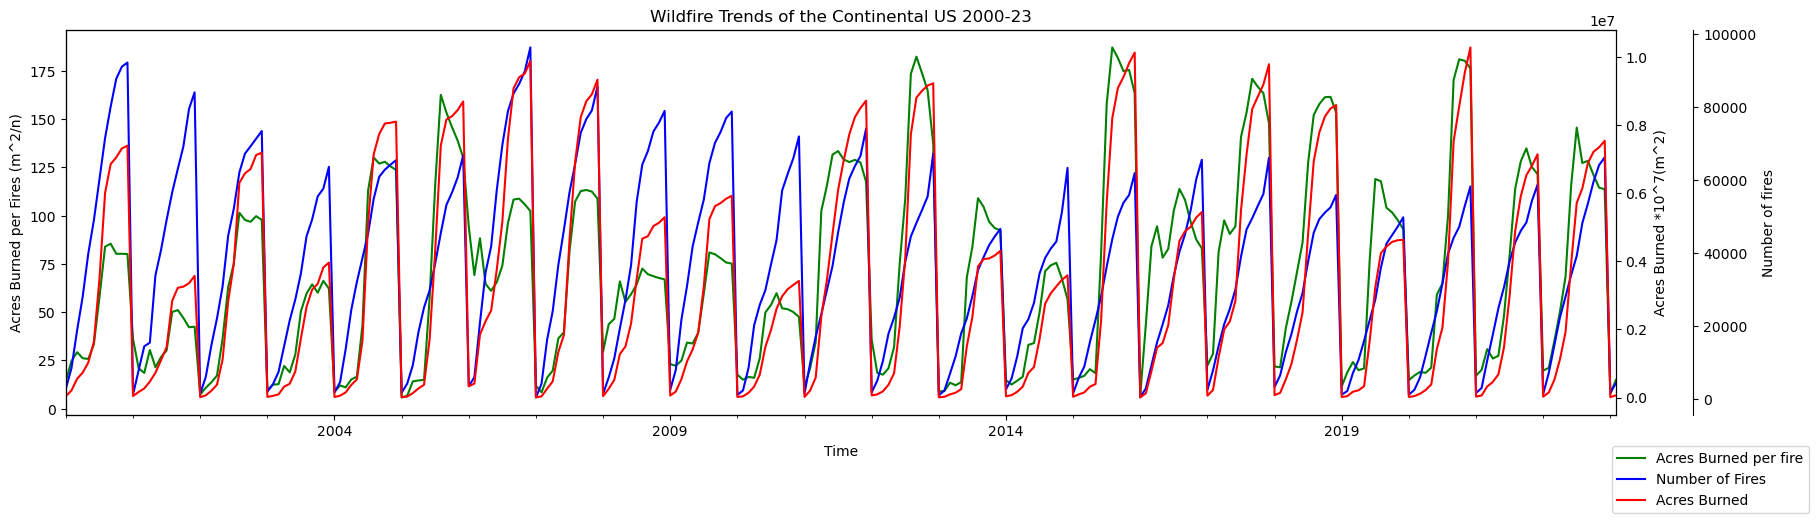

<Figure size 640x480 with 0 Axes>

In [40]:
'''
Creates a graph of the the number of fires, acres burned, and acres burned per fire over 2000-23. X axis is year
and there are 3 Y axis for number of fires, acres burned, and acres burned per fire. The different Y axis are to scale the three qualities of wildfire being measured so 
that it is easeir to see the seasonal simaliries. 

'''
fig, ax = plt.subplots(figsize = (20,5))

ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3= ax.twinx()
ax2
ax3.spines['right'].set_position(('axes', 1.05))

#ax3=df.plot(x='Time', y='Acres Burned per Fire', sharey= False,ax=ax3, style ='black')

ax0 = wfDataUS.plot(x='Time',y='Number of Fires', ax=ax3, style='b-',legend= None)
ax3.set_ylabel('Number of fires')
# same ax as above since it's automatically added on the right
ax2= wfDataUS.plot(x='Time', y= 'Acres Burned', ax=ax, style='r-', secondary_y=True, legend=None)
ax2.set_ylabel('Acres Burned *10^7(m^2)')


wfDataUS.plot(x='Time',y='Acres Burned per Fire', ax=ax, style='g-', legend=None)
ax.set_ylabel('Acres Burned per Fires (m^2/n)')

ax.set_title('Wildfire Trends of the Continental US 2000-23')

fig.legend([ax0,ax2,ax3], labels = ['Acres Burned per fire','Number of Fires','Acres Burned' ], loc = 'lower right', bbox_to_anchor=(1,-.1))

plt.xlabel('Year')

plt.show()

plt.savefig('wfTrend.png')

C:\Users\Thomas P Ho\AppData\Local\Temp\ipykernel_7116\2598705776.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax0,ax1], labels = ['D0-D4','Number of Fires'], loc = 'lower right', bbox_to_anchor=(.9,-.09))


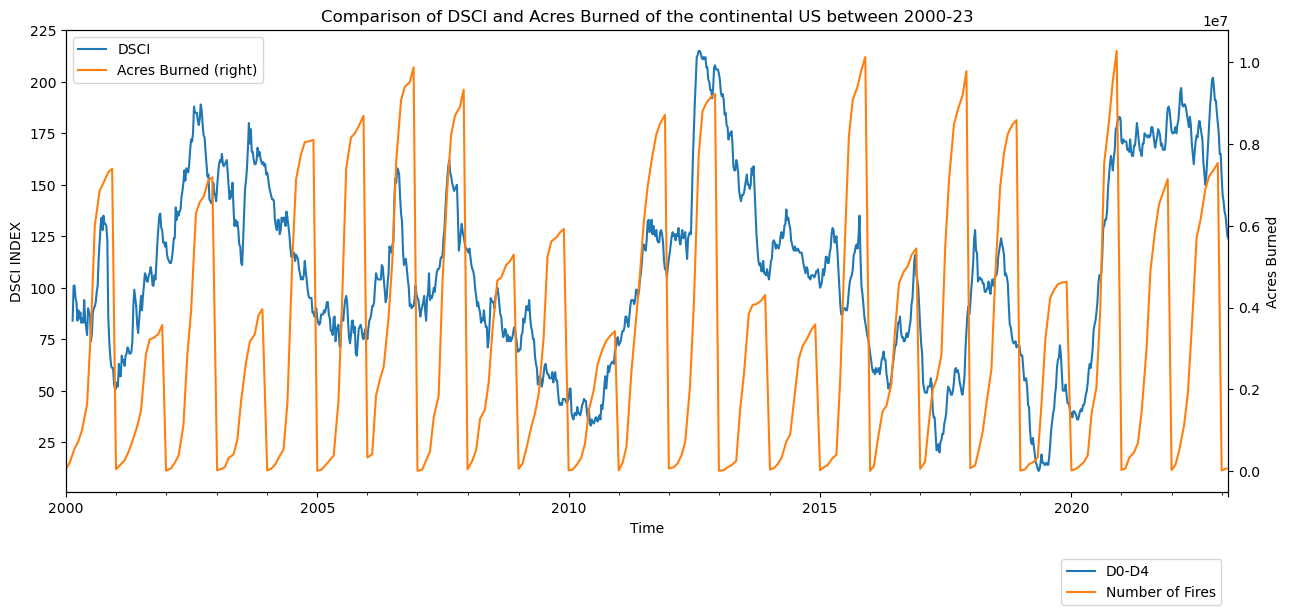

In [41]:
'''
Comparison of DSCI and Acres Burned. X axis is in years, 2 Y axis: one on left is DSCI INDEX which goes from 500-0 and on the right is acres burned from 0-1 which is 
then multiplied by 10*7.
'''
fig, ax = plt.subplots(figsize=(15,6))

ax0=droughtData.plot('Time', ['DSCI'],ax =ax)
ax1= wfDataUS.plot('Time','Acres Burned',ax=ax,secondary_y=True)
fig.legend([ax0,ax1], labels = ['D0-D4','Number of Fires'], loc = 'lower right', bbox_to_anchor=(.9,-.09))
ax0.set_ylabel('DSCI INDEX')
ax1.set_ylabel('Acres Burned')
plt.title("Comparison of DSCI and Acres Burned of the continental US between 2000-23")
plt.savefig('DSCI-US.png')